In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df = pd.read_csv('/content/drive/MyDrive/Data/soccer.csv')

In [32]:
df.head()

,x_1,x_2,Caught
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [33]:
X = df[['x_1','x_2']].values
y = df['Caught'].values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


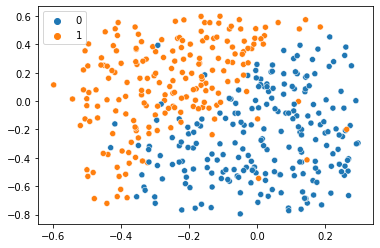

In [34]:
sns.scatterplot(X[:,0],X[:,1],hue = y)

In [35]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.3,random_state=4)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5)

In [36]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [37]:
model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

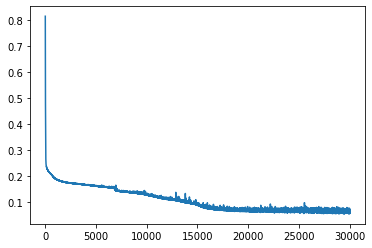

In [38]:
model.compile(optimizer='RMSprop',loss='binary_crossentropy')
model.fit(X_train_scaled,y_train,epochs=30000,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-0.8, 0.6)

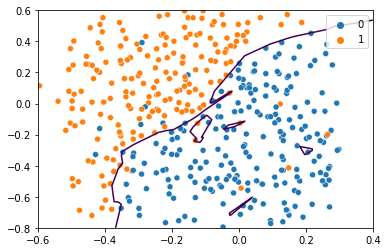

In [39]:
sns.scatterplot(X[:,0],X[:,1],hue=y)
xl, xr, dx = -0.6, 0.4, 0.001
yl, yr, dy = -0.8, 0.6, 0.001
u = np.arange(xl,xr,dx)
v = np.arange(yl,yr,dy)
u_r = np.ones((len(v),1))*u.reshape(1,len(u))
v_r = v.reshape(len(v),1)*np.ones((1,len(u)))
u_r = u_r.reshape(-1)
v_r = v_r.reshape(-1)
p_grid = np.column_stack((u_r,v_r)) 
p_grid_scaled = scaler.transform(p_grid)
f_grid = model.predict(p_grid_scaled)
f_grid = f_grid.reshape((len(v),len(u)))
plt.contour(u,v,f_grid,levels=[0.5])
plt.xlim(xl,xr)
plt.ylim(yl,yr)

In [40]:
J_train = model.evaluate(X_train_scaled,y_train)
J_val = model.evaluate(X_val_scaled,y_val)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train,J_val,J_test)
predictions_train = model.predict_classes(X_train_scaled)
print(classification_report(y_train,predictions_train))
predictions_val = model.predict_classes(X_val_scaled)
print(classification_report(y_val,predictions_val))
predictions_test = model.predict_classes(X_test_scaled)
print(classification_report(y_test,predictions_test))

2/2 [==============================] - 0s 4ms/step - loss: 0.7560
0.057647936046123505 7.606695175170898 0.7560079097747803
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       155
           1       0.96      0.98      0.97       132

    accuracy                           0.97       287
   macro avg       0.97      0.97      0.97       287
weighted avg       0.97      0.97      0.97       287

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        29

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.94      0.95        32

    accuracy                           0.95        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.95      0.95      0.95        62



In [41]:
len(y_train)

287

In [44]:
la = 0.001
model = Sequential()
model.add(Dense(20, activation='relu',kernel_regularizer=regularizers.l2(la)))
model.add(Dense(3, activation='relu',kernel_regularizer=regularizers.l2(la)))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(la)))

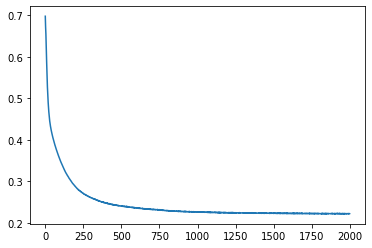

In [45]:
model.compile(optimizer='RMSprop',loss='binary_crossentropy')
model.fit(X_train_scaled,y_train,epochs=2000,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-0.8, 0.6)

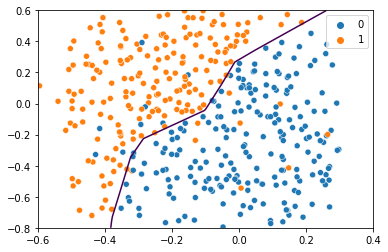

In [46]:
sns.scatterplot(X[:,0],X[:,1],hue=y)
xl, xr, dx = -0.6, 0.4, 0.001
yl, yr, dy = -0.8, 0.6, 0.001
u = np.arange(xl,xr,dx)
v = np.arange(yl,yr,dy)
u_r = np.ones((len(v),1))*u.reshape(1,len(u))
v_r = v.reshape(len(v),1)*np.ones((1,len(u)))
u_r = u_r.reshape(-1)
v_r = v_r.reshape(-1)
p_grid = np.column_stack((u_r,v_r)) 
p_grid_scaled = scaler.transform(p_grid)
f_grid = model.predict(p_grid_scaled)
f_grid = f_grid.reshape((len(v),len(u)))
plt.contour(u,v,f_grid,levels=[0.5])
plt.xlim(xl,xr)
plt.ylim(yl,yr)

In [ ]:
,kernel_regularizer=regularizers.l2(la)